# Proyecto 3

Esta tarea requiere que encuentres al menos dos datasets en la web que estén relacionados, y que visualices estos conjuntos de datos para responder una pregunta acerca de un tema amplio (por ejemplo: deportes, salud, actividad económica, comparaciones demográficas, climática, etc.) para la región de Salto, o Uruguay más ampliamente.

Debes combinar estos conjuntos de datos con datos de Uruguay y compararlos con otras regiones o paises. Por ejemplo, es posible que desee comparar un departamento de Uruguay, con una región de similares características en otro país. O datos de Uruguay comparados con otros países. En todos los casos al menos un archivo fuente debe ser de Uruguay o de uno de sus departamentos.

Puede elegir los conjuntos de datos a tu discreción. Los materiales delicados, confidenciales, ilícitos y patentados no son buenas opciones para conjuntos de datos para esta tarea.

Además, puedes conservar los datos en su idioma original, pero es una buena práctica también proporcionarlos con traducciones. Puedes proporcionar múltiples imágenes con las mismas visualizaciones pero en diferentes idiomas.

## Indicaciones

- Indica la región y la categoría de dominio de la que tratan los datasets (por ejemplo: Región: Salto, Uruguay; Categoría de dominio: deportes o atletismo).
- Debes formular una pregunta sobre la categoría de dominio y la región que identificaste como interesante.
- Debe proporcionar al menos dos enlaces a conjuntos de datos o datasets disponibles en la web. Estos pueden ser enlaces a archivos (csv o xls), o enlaces a sitios web que pueden tener datos en forma tabular, como páginas de Wikipedia.
- Debes generar al menos una imagen que responda a la pregunta de investigación que planteaste. Además de abordar la pregunta, esta imagen debe seguir los principios de Cairo de veracidad, funcionalidad, belleza y perspicacia.
- Debes contribuir con una breve justificación escrita (1-2 párrafos) de cómo su visualización aborda la pregunta de investigación planteada.
- Todo esto en un único archivo de Jupyter Notebook que debe contener las siguientes secciones:
  - Región y Dominio
  - Pregunta
  - Enlaces
  - Código con comentarios
  - Imágenes
  - Conclusión

## Consejos

- El gobierno de Uruguay tiene una política de Datos Abiertos y encontrarás información centralizada en el [Catálogo de Datos Abiertos](https://catalogodatos.gub.uy/).
- Wikipedia es una excelente fuente de datos y te recomendamos que la explores en busca de nuevas fuentes de datos.
- Varias agencias internacionales, como las [Naciones Unidas](https://data.un.org/), el [Banco Mundial](https://data.worldbank.org/) son otros excelentes lugares para buscar datos. En la WebAsignatura encontrarás más enlaces.
- Esta tarea requiere que conviertas y limpies los archivos de datos.
- Consulta en el foro de WebAsignatura para obtener consejos sobre cómo hacer esto de varias fuentes y comparte tus éxitos con tus compañeros.


## Análisis de Datos de Delitos en Buenos Aires y Uruguay

En este código se realiza un análisis de datos de delitos en Buenos Aires y Uruguay utilizando la biblioteca Pandas y Matplotlib en Python. A continuación, se describen los pasos clave del análisis:

1. **Carga de Datos**: Se importa la biblioteca `pandas` y se leen tres conjuntos de datos desde archivos CSV. Los datos corresponden a delitos en Buenos Aires para los años 2020 y 2021, y a delitos en Uruguay. Los datos se almacenan en los DataFrames `data_bsas2020`, `data_bsas2021`, y `data_uruguay`.
Cabe mencionar que los datos corresponden a delitos denunciados, no se tienen en cuenta aquellos que no fueron formalmente denunciados.
En la ciudad de Buenos Aires, según una encuesta del 2022 no fueron denunciados siete de cada 10 robos consumados y ocho de cada diez hurtos. 
https://www.iciudad.org.ar/mas-de-la-mitad-de-los-portenos-se-siente-poco-o-nada-seguro-viviendo-en-la-ciudad-de-buenos-aires/#:~:text=Seg%C3%BAn%20los%20datos%20de%20las,de%20cada%20diez%20hurtos%20consumados.
En Uruguay un estudio realizado por OPP-MIDES para el año 2011 indicaba que el porcentaje global de
delitos no denunciados en el año 2011 era del 47 %. No se encontraron datos más actualizados. 
https://www.undp.org/sites/g/files/zskgke326/files/2023-02/informe_final_estudio_de_circulacion_social_del_delito.pdf

2. **Limpieza de Datos**:
   - En el DataFrame `data_uruguay`, se reemplaza la categoría "RAPIÑA" por "Robo" en la columna "DELITO".
   - En los DataFrames `data_bsas2020` y `data_bsas2021`, se limpia el texto en la columna "tipo" eliminando cualquier información entre paréntesis utilizando expresiones regulares.

3. **Conteo de Delitos**:
   - Se calcula la cantidad de delitos de "Robo" y "Hurto" en el año 2020 en Buenos Aires y se almacenan en las variables `robos_bsas2020` y `hurtos_bsas2020`.
   - Se realiza un cálculo similar para el año 2021 en Buenos Aires y se almacenan en las variables `robos_bsas2021` y `hurtos_bsas2021`.
   - Para Uruguay, se realiza el conteo de delitos de "Robo" y "HURTO" en los años 2020 y 2021, y se almacenan en las variables `robos_uruguay2020`, `hurtos_uruguay2020`, `robos_uruguay2021`, y `hurtos_uruguay2021`.

Este código es un paso inicial en el análisis de datos y se utiliza para cargar, limpiar y contar delitos en dos ubicaciones diferentes y para dos años específicos. Los resultados de estos conteos se pueden utilizar para análisis posteriores o para generar visualizaciones de datos.


In [73]:
import pandas as pd
import matplotlib.ticker as mtick

data_bsas2021 = pd.read_csv("../Proyecto_3/idea/delitos_2021.csv", sep=";")
data_bsas2020 = pd.read_csv("../Proyecto_3/idea/delitos_2020.csv") 
data_uruguay = pd.read_csv("../Proyecto_3/idea/otros_delitos.csv", sep=";")



C:\Users\danie\AppData\Local\Temp\ipykernel_4324\874987454.py:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data_uruguay = pd.read_csv("../Proyecto_3/idea/otros_delitos.csv", sep=";")


In [74]:
# Reemplazar "RAPIÑA" por "Robo" en la columna "DELITO" del DataFrame "data_uruguay"
data_uruguay["DELITO"].replace(
    {
        "RAPIÑA": "Robo"
    }, inplace=True
)

# Limpiar el texto en la columna "tipo" del DataFrame "data_bsas2020" y "data_bsas2021"
data_bsas2020["tipo"] = data_bsas2020["tipo"].str.replace(r"\s*\(.*\)", "", regex=True)
data_bsas2021["tipo"] = data_bsas2021["tipo"].str.replace(r"\s*\(.*\)", "", regex=True)

# Contar la cantidad de "Robo" y "Hurto" en el año 2020 en Buenos Aires (data_bsas2020)
robos_bsas2020 = len(data_bsas2020[(data_bsas2020["anio"] == 2020) & (data_bsas2020["tipo"] == "Robo")])
hurtos_bsas2020 = len(data_bsas2020[(data_bsas2020["anio"] == 2020) & (data_bsas2020["tipo"] == "Hurto")])

# Contar la cantidad de "Robo" y "Hurto" en el año 2020 en Buenos Aires (data_bsas2021)
robos_bsas2021 = len(data_bsas2021[(data_bsas2021["anio"] == 2021) & (data_bsas2021["tipo"] == "Robo")])
hurtos_bsas2021 = len(data_bsas2021[(data_bsas2021["anio"] == 2021) & (data_bsas2021["tipo"] == "Hurto")])

# Contar la cantidad de "Robo" y "HURTO" en el año 2020 en Uruguay (data_uruguay)
robos_uruguay2020 = len(data_uruguay[(data_uruguay["AÑO"] == 2020) & (data_uruguay["DELITO"] == "Robo")])
hurtos_uruguay2020 = len(data_uruguay[(data_uruguay["AÑO"] == 2020) & (data_uruguay["DELITO"] == "HURTO")])

# Contar la cantidad de "Robo" y "HURTO" en el año 2021 en Uruguay (data_uruguay)
robos_uruguay2021 = len(data_uruguay[(data_uruguay["AÑO"] == 2021) & (data_uruguay["DELITO"] == "Robo")])
hurtos_uruguay2021 = len(data_uruguay[(data_uruguay["AÑO"] == 2021) & (data_uruguay["DELITO"] == "HURTO")])


## Comparación de Robos y Hurtos en Buenos Aires y Uruguay en 2020

En este segmento de código se crea un gráfico de barras que permite comparar la cantidad de delitos de "Robo" y "Hurto" en Buenos Aires y Uruguay durante el año 2020. A continuación, se detallan los elementos clave del gráfico y su propósito:

- **Regiones**: Se definen las categorías "BsAs - Robo", "Uruguay - Robo", "BsAs - Hurto" y "Uruguay - Hurto" para representar las regiones y tipos de delitos que se compararán en el gráfico.

- **Counts**: Se definen las cantidades de delitos correspondientes a cada región y tipo de delito. Estos valores se obtuvieron previamente en el análisis de datos y se almacenan en la lista `counts`.

- **Creación del Gráfico**: Se utiliza la biblioteca Matplotlib para crear un gráfico de barras. El gráfico se configura con un tamaño de figura de 8x6 pulgadas.

- **Barras y Colores**: Se crean las barras del gráfico con los valores de `counts` y se les asignan colores específicos para cada región y tipo de delito.

- **Título y Etiquetas**: El gráfico se etiqueta con un título que indica la comparación de robos y hurtos en el año 2020. Los ejes se etiquetan para indicar la cantidad de delitos y

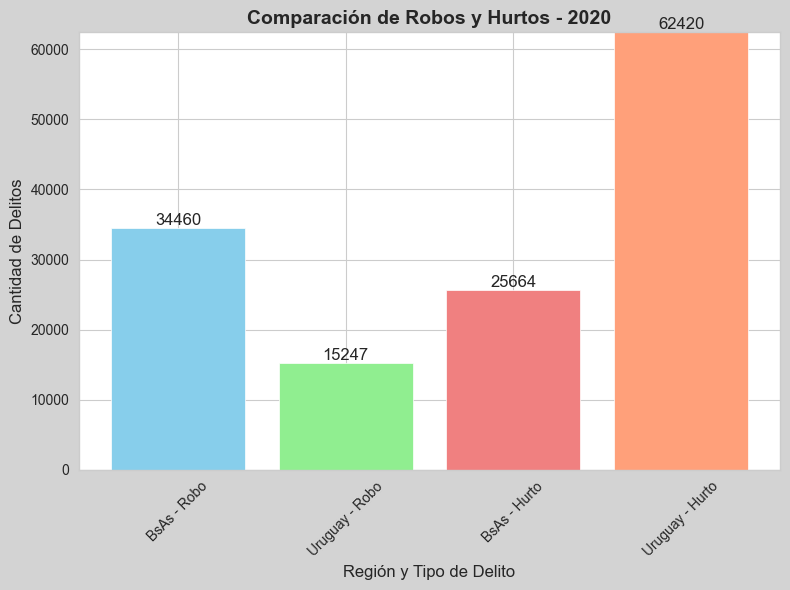

In [75]:
import matplotlib.pyplot as plt

# Datos para el gráfico de barras
regions = ['BsAs - Robo', 'Uruguay - Robo', 'BsAs - Hurto', 'Uruguay - Hurto']
counts = [robos_bsas2020, robos_uruguay2020, hurtos_bsas2020, hurtos_uruguay2020]

# Estilo de paleta de colores
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']

plt.figure(figsize=(8, 6), facecolor='lightgray')  # Cambiar el fondo del gráfico

plt.bar(regions, counts, color=colors)

# Etiquetas a las barras
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

# Estilo de fuente
plt.title('Comparación de Robos y Hurtos - 2020', fontweight='bold', fontsize=14)
plt.xlabel('Región y Tipo de Delito', fontsize=12)
plt.ylabel('Cantidad de Delitos', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Límites personalizados para el eje y
plt.ylim(0, max(counts) + 10)

# Mostrar el gráfico de barras
plt.tight_layout()

plt.show()



## Comparación de Robos y Hurtos en Buenos Aires y Uruguay en 2021

Este fragmento de código se encarga de crear un gráfico de barras que compara la cantidad de delitos de "Robo" y "Hurto" en Buenos Aires y Uruguay durante el año 2021. A continuación, se explican los elementos clave del gráfico y su función:

- **Regiones**: Se definen las categorías "BsAs - Robo", "Uruguay - Robo", "BsAs - Hurto" y "Uruguay - Hurto" para representar las regiones y tipos de delitos que se compararán en el gráfico.

- **Counts**: Se definen las cantidades de delitos correspondientes a cada región y tipo de delito. Estos valores se obtuvieron previamente en el análisis de datos y se almacenan en la lista `counts`.

- **Creación del Gráfico**: Se utiliza la biblioteca Matplotlib para crear un gráfico de barras. El gráfico se configura con un tamaño de figura de 8x6 pulgadas.

- **Barras y Colores**: Se crean las barras del gráfico con los valores de `counts` y se les asignan colores específicos para cada región y tipo de delito.

- **Título y Etiquetas**: El gráfico se etiqueta con un título que indica la comparación de robos y hurtos en el año 2021. Los ejes se etiquetan para indicar la cantidad de delitos y las regiones.

- **Rotación de Etiquetas**: Las etiquetas en el eje x (regiones) se rotan 45 grados para facilitar la legibilidad.

- **Mostrar el Gráfico**: Finalmente, se muestra el gr


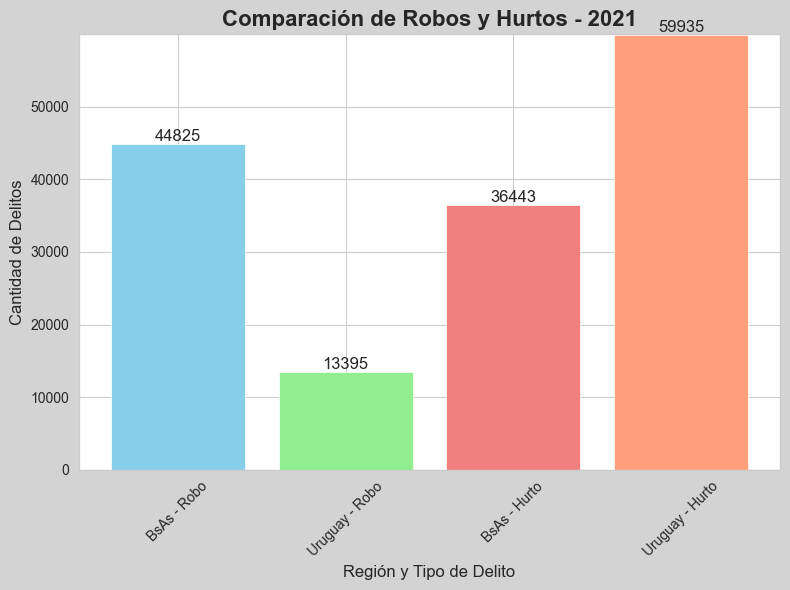

In [76]:
import matplotlib.pyplot as plt

# Datos para el gráfico de barras
regions = ['BsAs - Robo', 'Uruguay - Robo', 'BsAs - Hurto', 'Uruguay - Hurto']
counts = [robos_bsas2021, robos_uruguay2021, hurtos_bsas2021, hurtos_uruguay2021]

# Estilo de paleta de colores
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']

plt.figure(figsize=(8, 6), facecolor='lightgray')  # Cambiar el fondo del gráfico

plt.bar(regions, counts, color=colors)

# Etiquetas a las barras
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

# Estilo de fuente
plt.title('Comparación de Robos y Hurtos - 2021', fontsize=16, fontweight='bold')
plt.xlabel('Región y Tipo de Delito', fontsize=12)
plt.ylabel('Cantidad de Delitos', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Límites personalizados para el eje y
plt.ylim(0, max(counts) + 10)

# Mostrar el gráfico de barras
plt.tight_layout()

plt.show()


## Análisis Comparativo de la Evolución de Delitos en Buenos Aires y Uruguay

Este código tiene como objetivo analizar y comparar la evolución de los delitos de "Robo" y "Hurto" en Buenos Aires y Uruguay durante los años 2020 y 2021. A continuación, se detallan los pasos clave y el propósito de cada sección del código:

1. **Reemplazo de Categoría**: En esta sección, se reemplaza la categoría "RAPIÑA" por "Robo" en la columna "DELITO" del DataFrame "data_uruguay". Esto se hace para estandarizar la nomenclatura de delitos.

2. **Filtrado de Datos**: Se filtran los datos de Buenos Aires y Uruguay para incluir solo los años 2020 y 2021. Esto se logra utilizando las funciones `isin()` para seleccionar los años deseados en ambos DataFrames, creando así los DataFrames `data_bsas_2020_2021` y `data_uruguay_2020_2021`.

3. **Cálculo de Recuento de Delitos**: Se calcula el recuento de delitos por año para Buenos Aires y Uruguay. Para Buenos Aires, se utiliza la función `groupby()` para agrupar los datos por año y tipo de delito ("Robo" o "Hurto"). Luego, se utiliza la función `value_counts()` para contar la cantidad de delitos de cada tipo en cada año y se crea una estructura de datos tabular (DataFrame) utilizando `unstack()`. Los valores faltantes se llenan con ceros (0) utilizando `fillna(0)`. Un proceso similar se aplica para los datos de Uruguay.

4. **Creación del Gráfico de Líneas**: Se utiliza la biblioteca Matplotlib para crear un gráfico de líneas que muestra la evolución de los delitos de "Robo" y "Hurto" en Buenos Aires y Uruguay. Se definen líneas separadas para cada región y tipo de delito, y se utilizan etiquetas y estilos para facilitar la identificación. El gráfico se configura con un título, etiquetas de ejes y una leyenda que muestra la representación de cada línea.

5. **Mostrar el Gráfico**: Finalmente, se muestra el gráfico de líneas utilizando `plt.show()`. El gráfico proporciona una representación visual de la evolución de los delitos en ambas ubicaciones durante los años 2020 y 2021, lo que puede ayudar a identificar tendencias o diferencias en la incidencia de estos delitos.

Este código es una parte importante del análisis de datos y permite visualizar y comparar la evolución de los delitos en dos lugares diferentes a lo largo de un período de dos años.


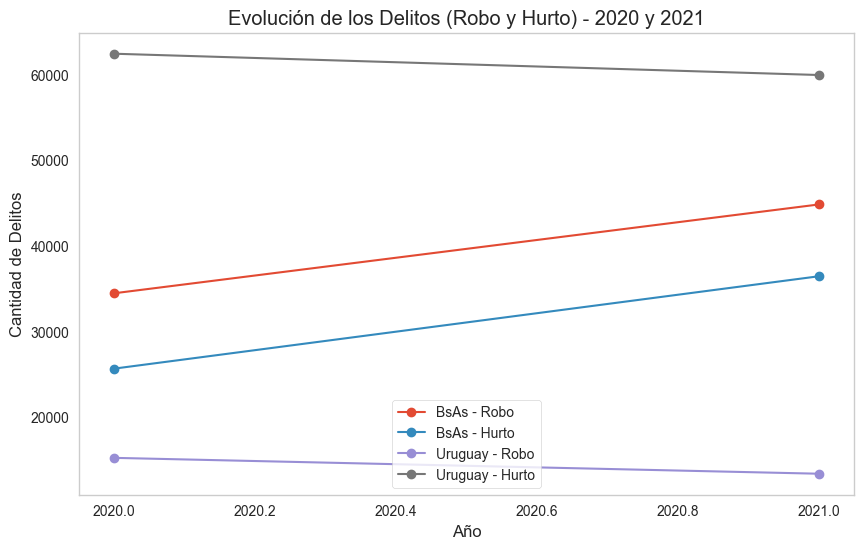

In [77]:
# Reemplazar "RAPIÑA" por "Robo" en la columna "DELITO" del DataFrame "data_uruguay"
data_uruguay["DELITO"].replace(
    {
        "RAPIÑA": "Robo"
    }, inplace=True
)

# Combinar los datos de 2020 y 2021 en un solo DataFrame para Buenos Aires
data_bsas = pd.concat([data_bsas2020, data_bsas2021])

# Filtrar los datos de Buenos Aires y Uruguay solo para los años 2020 y 2021
data_bsas_2020_2021 = data_bsas[data_bsas["anio"].isin([2020, 2021])]
data_uruguay_2020_2021 = data_uruguay[data_uruguay["AÑO"].isin([2020, 2021])]

# Calcular el recuento de delitos por año para Buenos Aires
bsas_counts = data_bsas_2020_2021.groupby("anio")["tipo"].value_counts().unstack().fillna(0)

# Calcular el recuento de delitos por año para Uruguay
uruguay_counts = data_uruguay_2020_2021.groupby("AÑO")["DELITO"].value_counts().unstack().fillna(0)

# Crear un gráfico de líneas para mostrar la evolución de los delitos en ambos lugares
plt.figure(figsize=(10, 6))
plt.plot(bsas_counts.index, bsas_counts["Robo"], label="BsAs - Robo", marker='o', linestyle='-')
plt.plot(bsas_counts.index, bsas_counts["Hurto"], label="BsAs - Hurto", marker='o', linestyle='-')
plt.plot(uruguay_counts.index, uruguay_counts["Robo"], label="Uruguay - Robo", marker='o', linestyle='-')
plt.plot(uruguay_counts.index, uruguay_counts["HURTO"], label="Uruguay - Hurto", marker='o', linestyle='-')
plt.title('Evolución de los Delitos (Robo y Hurto) - 2020 y 2021')
plt.xlabel('Año')
plt.ylabel('Cantidad de Delitos')
plt.legend()
plt.grid()
plt.show()

# Análisis de Tasas de Robo y Hurto en Buenos Aires y Uruguay (2020 y 2021)

En este análisis, se compara la incidencia de delitos de robo y hurto en Buenos Aires y Uruguay durante los años 2020 y 2021. El análisis se divide en varias etapas, incluyendo la carga de datos, preparación de datos, cálculo de tasas y creación de gráficos.

## Carga de Datos

- Se inicia el análisis cargando los datos de incidentes de delitos de Buenos Aires y Uruguay desde archivos CSV. Estos archivos contienen información detallada sobre los delitos.

## Preparación de Datos

- Se realiza una preparación de datos para asegurar que estén listos para su análisis. Esto incluye reemplazar "RAPIÑA" por "Robo" en la columna "DELITO" del DataFrame de Uruguay, y limpiar el texto en la columna "tipo" de los DataFrames de Buenos Aires.

## Cálculo de Tasas

- Luego, se calcula el número de incidentes de robo y hurto en Buenos Aires y Uruguay para los años 2020 y 2021. Esto implica filtrar los datos y contar las ocurrencias de cada tipo de delito.

## Cálculo de Tasas por Habitante

- A continuación, se calculan las tasas de robo y hurto por habitante en 2020 y 2021 para ambos lugares. Estas tasas se calculan dividiendo el número de incidentes por la población estimada para cada año.

## Creación de Gráfico

- Finalmente, se crea un gráfico de barras para comparar las tasas de robo y hurto por habitante en 2020 y 2021 para Buenos Aires y Uruguay. En el gráfico, se muestran cuatro ubicaciones y años diferentes para hacer una comparación visual.

El análisis se basa en datos reales de incidentes de delitos y población estimada, lo que permite una comparación significativa entre las tasas de delitos en ambos lugares a lo largo del tiempo.


C:\Users\danie\AppData\Local\Temp\ipykernel_4324\612979224.py:7: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data_uruguay = pd.read_csv("../Proyecto_3/idea/otros_delitos.csv", sep=';', header=0)


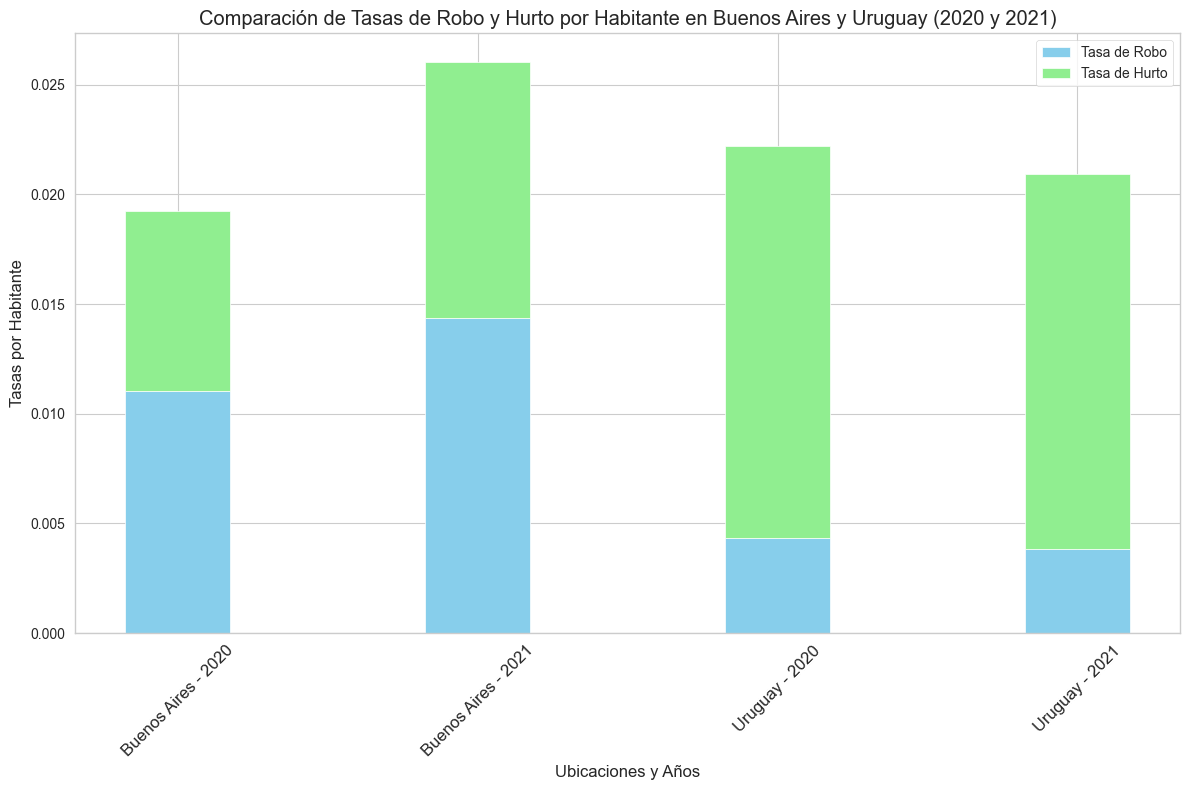

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos de Buenos Aires y Uruguay desde archivos CSV
data_bsas_2020 = pd.read_csv("../Proyecto_3/idea/delitos_2020.csv")
data_bsas_2021 = pd.read_csv("../Proyecto_3/idea/delitos_2021.csv", sep=';', header=0)
data_uruguay = pd.read_csv("../Proyecto_3/idea/otros_delitos.csv", sep=';', header=0)

# Especifica las cifras de población para Buenos Aires y Uruguay en 2020 y 2021
poblacion_buenos_aires_2020_2021 = 3120612  # Estimado
poblacion_uruguay_2020_2021 = 3500000  # Estimado

# Reemplazar "RAPIÑA" por "Robo" en la columna "DELITO" del DataFrame de Uruguay
data_uruguay["DELITO"].replace(
    {
        "RAPIÑA": "Robo"
    }, inplace=True
)

# Limpiar el texto en la columna "tipo" de los DataFrames de Buenos Aires
data_bsas_2020["tipo"] = data_bsas_2020["tipo"].str.replace(r"\s*\(.*\)", "", regex=True)
data_bsas_2021["tipo"] = data_bsas_2021["tipo"].str.replace(r"\s*\(.*\)", "", regex=True)

# Calcular el número de incidentes de Robo y Hurto en Buenos Aires y Uruguay en 2020 y 2021
robos_buenos_aires_2020 = len(data_bsas_2020[(data_bsas_2020["anio"] == 2020) & (data_bsas_2020["tipo"] == "Robo")])
hurtos_buenos_aires_2020 = len(data_bsas_2020[(data_bsas_2020["anio"] == 2020) & (data_bsas_2020["tipo"] == "Hurto")])
robos_buenos_aires_2021 = len(data_bsas_2021[(data_bsas_2021["anio"] == 2021) & (data_bsas_2021["tipo"] == "Robo")])
hurtos_buenos_aires_2021 = len(data_bsas_2021[(data_bsas_2021["anio"] == 2021) & (data_bsas_2021["tipo"] == "Hurto")])
robos_uruguay_2020 = len(data_uruguay[(data_uruguay["AÑO"] == 2020) & (data_uruguay["DELITO"] == "Robo")])
hurtos_uruguay_2020 = len(data_uruguay[(data_uruguay["AÑO"] == 2020) & (data_uruguay["DELITO"] == "HURTO")])
robos_uruguay_2021 = len(data_uruguay[(data_uruguay["AÑO"] == 2021) & (data_uruguay["DELITO"] == "Robo")])
hurtos_uruguay_2021 = len(data_uruguay[(data_uruguay["AÑO"] == 2021) & (data_uruguay["DELITO"] == "HURTO")])

# Calcular tasas de Robo y Hurto por habitante en 2020 y 2021
tasa_robo_buenos_aires_2020 = robos_buenos_aires_2020 / poblacion_buenos_aires_2020_2021
tasa_hurto_buenos_aires_2020 = hurtos_buenos_aires_2020 / poblacion_buenos_aires_2020_2021
tasa_robo_buenos_aires_2021 = robos_buenos_aires_2021 / poblacion_buenos_aires_2020_2021
tasa_hurto_buenos_aires_2021 = hurtos_buenos_aires_2021 / poblacion_buenos_aires_2020_2021
tasa_robo_uruguay_2020 = robos_uruguay_2020 / poblacion_uruguay_2020_2021
tasa_hurto_uruguay_2020 = hurtos_uruguay_2020 / poblacion_uruguay_2020_2021
tasa_robo_uruguay_2021 = robos_uruguay_2021 / poblacion_uruguay_2020_2021
tasa_hurto_uruguay_2021 = hurtos_uruguay_2021 / poblacion_uruguay_2020_2021

# Crear gráficos de barras para comparar las tasas de Robo y Hurto por habitante en 2020 y 2021
ubicaciones = ['Buenos Aires - 2020', 'Buenos Aires - 2021', 'Uruguay - 2020', 'Uruguay - 2021']
tasas_robo = [tasa_robo_buenos_aires_2020, tasa_robo_buenos_aires_2021, tasa_robo_uruguay_2020, tasa_robo_uruguay_2021]
tasas_hurto = [tasa_hurto_buenos_aires_2020, tasa_hurto_buenos_aires_2021, tasa_hurto_uruguay_2020, tasa_hurto_uruguay_2021]

plt.figure(figsize=(12, 8))

# Utilizar colores distintos para Robo y Hurto
bar_width = 0.35
index = range(len(ubicaciones))
plt.bar(index, tasas_robo, bar_width, label='Tasa de Robo', color='skyblue')
plt.bar(index, tasas_hurto, bar_width, label='Tasa de Hurto', color='lightgreen', bottom=tasas_robo)

plt.xlabel('Ubicaciones y Años')
plt.ylabel('Tasas por Habitante')
plt.title('Comparación de Tasas de Robo y Hurto por Habitante en Buenos Aires y Uruguay (2020 y 2021)')
plt.xticks(index, ubicaciones, rotation=45, fontsize=12)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# Análisis de Tasas de Delitos en Buenos Aires y Uruguay

## Región y Dominio
- Región: Buenos Aires, Argentina, y Uruguay.
- Categoría de Dominio: Seguridad pública y delitos.

## Pregunta de Investigación
¿Cómo varían las tasas de robo y hurto por habitante en Buenos Aires y Uruguay en los años 2020 y 2021, y cuál de las dos ubicaciones muestra tasas más altas o bajas?

## Enlaces a Conjuntos de Datos
Los datos utilizados en este análisis son conjuntos de datos locales, por lo que no hay enlaces a fuentes externas.
Los dataset se extrajeron de las siguientes páginas:
- [Buenos Aires - Delitos](https://data.buenosaires.gob.ar/dataset/delitos)
- [Catálogo de Datos de Uruguay](https://catalogodatos.gub.uy/)

## Conclusión
El análisis de tasas de delitos permite comparar las diferencias en la incidencia de robos y hurtos entre Buenos Aires y Uruguay en los años 2020 y 2021. Estos códigos y gráficos proporcionan información visual que ayuda a responder a la pregunta de investigación, mostrando claramente cómo varían las tasas de delitos en ambas ubicaciones y años. La justificación es que las tasas de delitos son un indicador importante de la seguridad pública y pueden ser de interés para los responsables de la toma de decisiones y la comunidad en general.
